In [1]:
import seml
import pandas as pd
from matplotlib import pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

/nfs/homedirs/ayle/miniconda3/envs/gr/lib/python3.8/site-packages/seml/database.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
results = seml.get_results('lenet5', to_data_frame=True)

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

/nfs/homedirs/ayle/miniconda3/envs/gr/lib/python3.8/site-packages/seml/evaluation.py:80: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  parsed = pd.io.json.json_normalize(parsed, sep='.')


In [3]:
result_cols = [col for col in results.columns if col.startswith("result")]

In [4]:
results = results.groupby(['config.arguments.train_scheme', 'config.arguments.prune_criterion', 'config.arguments.pruning_limit',
                          'config.arguments.data_set', 'config.arguments.seed'
                          ])[
    result_cols
].agg('mean')

In [5]:
results

result.train_acc  \
config.arguments.train_scheme config.arguments.prune_criterion config.arguments.pruning_limit config.arguments.data_set config.arguments.seed                     
DefaultTrainer                EarlyJohn                        0.80                           CIFAR10                   1234                           0.718750   
                                                               0.90                           CIFAR10                   1234                           0.671875   
                                                               0.98                           CIFAR10                   1234                           0.546875   
                                                                                              FASHION                   1234                           0.921875   
                                                                                              MNIST                     1234                           0.984375   
                              EmptyCrit                        0.00                           CIFAR10                   1234                           0.875000   
                                                                                              FASHION                   1234                           0.984375   
                                                                                              MNIST                     1234                           1.000000   

                                                                                                                                               result.test_acc  \
config.arguments.train_scheme config.arguments.prune_criterion config.arguments.pruning_limit config.arguments.data_set config.arguments.seed                    
DefaultTrainer                EarlyJohn                        0.80                           CIFAR10                   1234                          0.736465   
                                                               0.90                           CIFAR10                   1234                          0.707803   
                                                               0.98                           CIFAR10                   1234                          0.592058   
                                                                                              FASHION                   1234                          0.883559   
                                                                                              MNIST                     1234                          0.983579   
                              EmptyCrit                        0.00                           CIFAR10                   1234                          0.736963   
                                                                                              FASHION                   1234                          0.901075   
                                                                                              MNIST                     1234                          0.989053   

                                                                                                                                               result.sparsity  \
config.arguments.train_scheme config.arguments.prune_criterion config.arguments.pruning_limit config.arguments.data_set config.arguments.seed                    
DefaultTrainer                EarlyJohn                        0.80                           CIFAR10                   1234                          0.798746   
                                                               0.90                           CIFAR10                   1234                          0.898588   
                                                               0.98                           CIFAR10                   1234                          0.978456   
                                                                                 

In [7]:
results = results.reset_index()

In [8]:
subset = results[(results["config.arguments.train_scheme"] == "DefaultTrainer") &
           ((results["config.arguments.prune_criterion"] == "SNIPitDuring") |
           (results["config.arguments.prune_criterion"] == "EmptyCrit"))]

In [9]:
subset

,config.arguments.train_scheme,config.arguments.prune_criterion,config.arguments.pruning_limit,result.train_acc,result.test_acc,result.sparsity,result.success_rate_FGSM_6,result.success_rate_FGSM_12,result.success_rate_FGSM_24,result.success_rate_FGSM_48,result.success_rate_L2FGSM_6,result.success_rate_L2FGSM_12,result.success_rate_L2FGSM_24,result.success_rate_L2FGSM_48,result.conf_auroc,result.conf_aupr,result.brier_score,result.entropy,result.auroc_FASHION,result.aupr_FASHION,result.entropy_FASHION,result.auroc_OMNIGLOT,result.aupr_OMNIGLOT,result.entropy_OMNIGLOT,result.auroc_KMNIST,result.aupr_KMNIST,result.entropy_KMNIST,result.auroc_GAUSSIAN,result.aupr_GAUSSIAN,result.entropy_GAUSSIAN,result.auroc_OODOMAIN,result.aupr_OODOMAIN,result.entropy_OODOMAIN
8,DefaultTrainer,EmptyCrit,0.00,0.998047,0.989805,0.000000,0.050594,0.147949,0.456363,0.810976,0.011836,0.013297,0.016353,0.023805,0.978685,0.999758,0.016764,0.015139,0.935110,0.937501,0.460856,0.945330,0.958978,0.463385,0.962043,0.963325,0.510852,0.682503,0.722137,0.068588,0.115557,0.330813,1.816197e-05
10,DefaultTrainer,SNIPitDuring,0.50,0.998698,0.990612,0.499213,0.047302,0.132202,0.340349,0.620123,0.010549,0.011941,0.014566,0.021368,0.984716,0.999856,0.014744,0.014555,0.956603,0.963308,0.418675,0.978140,0.985564,0.303792,0.964023,0.962921,0.559308,0.614042,0.647183,0.092961,0.186550,0.354977,1.192093e-07
11,DefaultTrainer,SNIPitDuring,0.70,0.996094,0.989528,0.698896,0.045640,0.123148,0.265767,0.343712,0.011098,0.012328,0.014949,0.021473,0.983178,0.999833,0.015476,0.014329,0.930880,0.925654,0.431342,0.925735,0.938966,0.185761,0.968650,0.970357,0.567952,0.631990,0.659362,0.019557,0.237394,0.375095,3.766027e-04
12,DefaultTrainer,SNIPitDuring,0.80,0.999349,0.991039,0.798744,0.050538,0.133538,0.265933,0.328502,0.011301,0.012462,0.015420,0.023125,0.983088,0.999820,0.015894,0.015002,0.933250,0.927185,0.370337,0.947782,0.963086,0.077301,0.962523,0.961231,0.573550,0.447595,0.477828,0.002813,0.244927,0.378321,5.441070e-06
13,DefaultTrainer,SNIPitDuring,0.90,0.996745,0.990749,0.898585,0.053156,0.139271,0.267230,0.328872,0.010809,0.012205,0.015684,0.023466,0.980204,0.999795,0.015759,0.016010,0.919632,0.917023,0.377847,0.909856,0.933302,0.255441,0.957555,0.954641,0.535664,0.621567,0.639933,0.101369,0.247538,0.379214,4.706078e-04
14,DefaultTrainer,SNIPitDuring,0.95,0.996745,0.989553,0.948502,0.054582,0.138706,0.245096,0.307456,0.011456,0.013293,0.016443,0.025013,0.983212,0.999827,0.016587,0.017892,0.932289,0.939633,0.414692,0.904164,0.915957,0.166255,0.953612,0.952021,0.486253,0.613177,0.637180,0.133152,0.261967,0.385590,1.192093e-07
15,DefaultTrainer,SNIPitDuring,0.98,0.984375,0.987485,0.978452,0.068080,0.175182,0.360062,0.494851,0.014254,0.016240,0.019552,0.028780,0.974977,0.999662,0.022629,0.030793,0.940752,0.941099,0.768343,0.963118,0.974223,0.341314,0.958791,0.962676,0.721749,0.912026,0.938133,0.197805,0.151652,0.340583,2.379023e-04


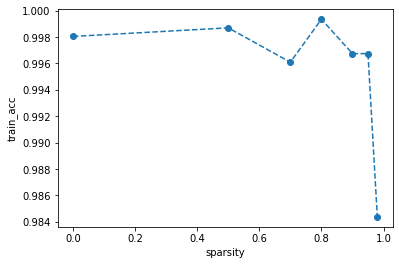

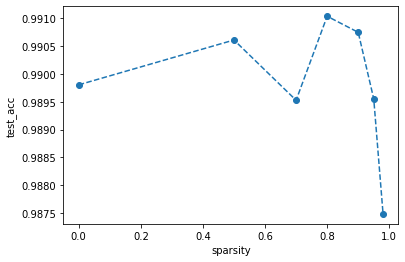

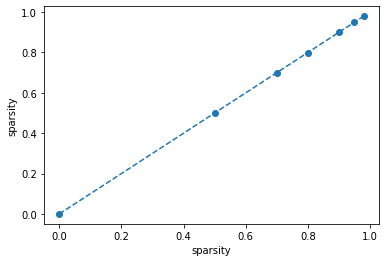

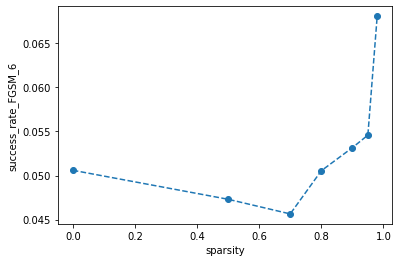

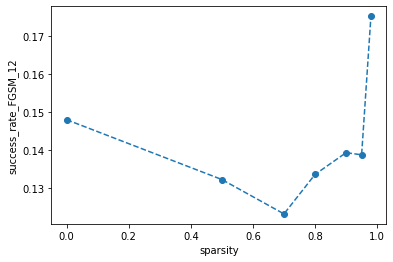

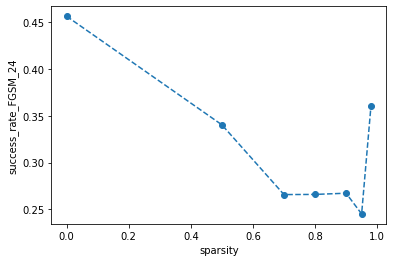

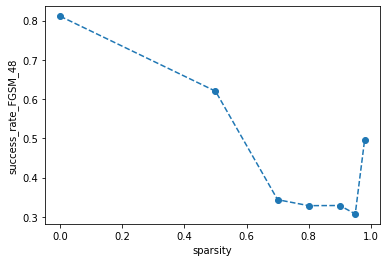

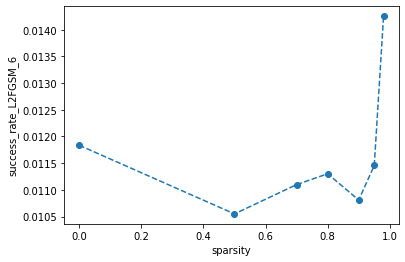

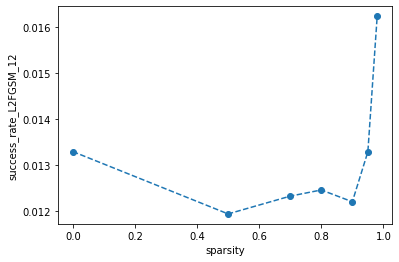

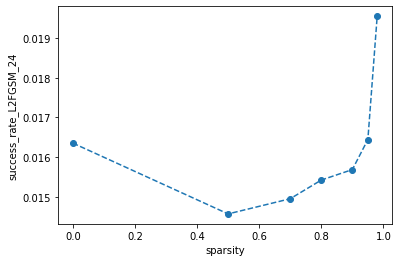

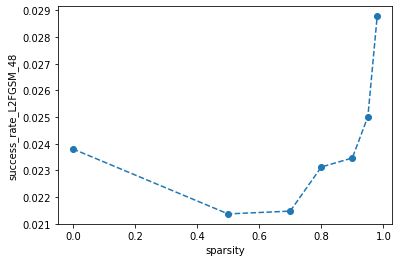

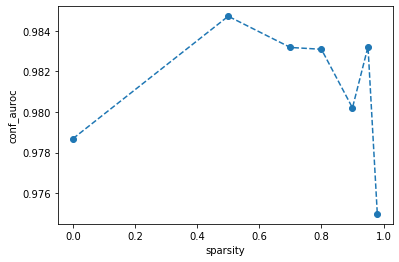

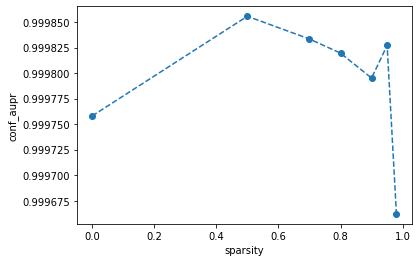

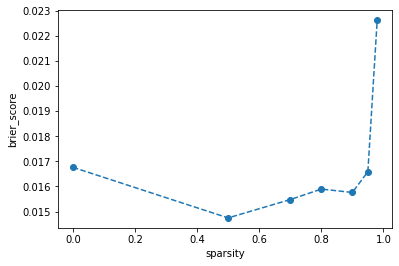

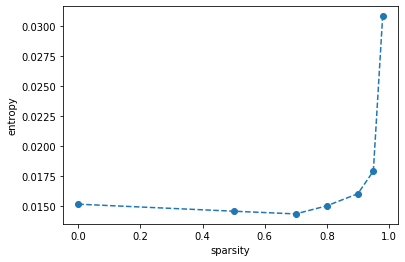

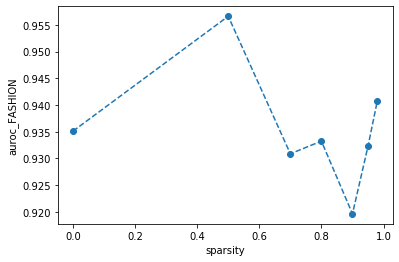

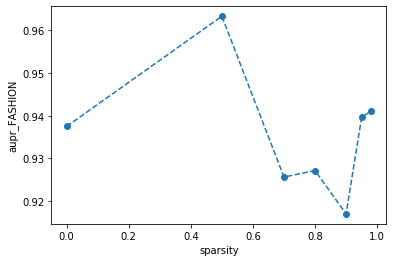

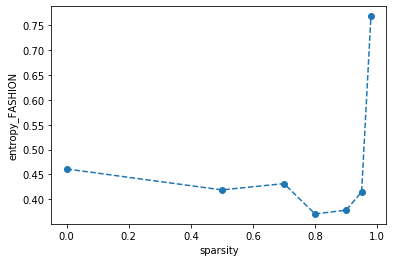

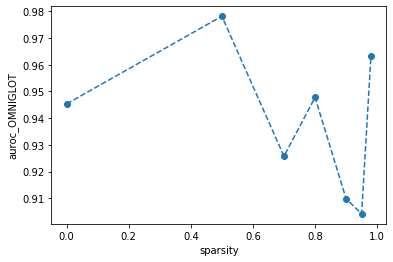

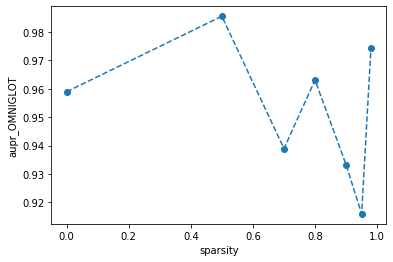

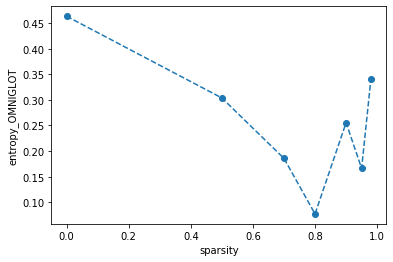

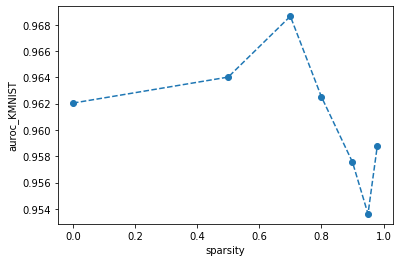

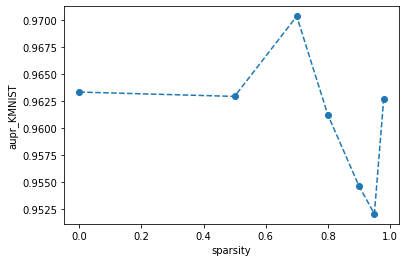

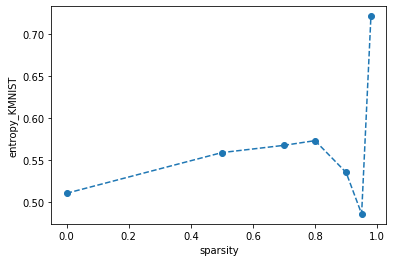

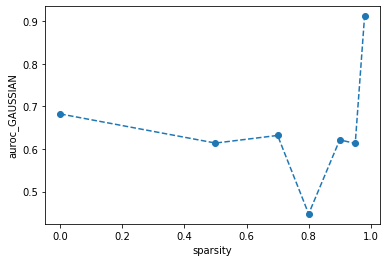

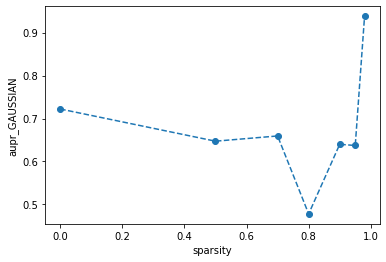

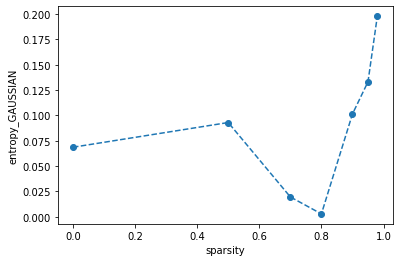

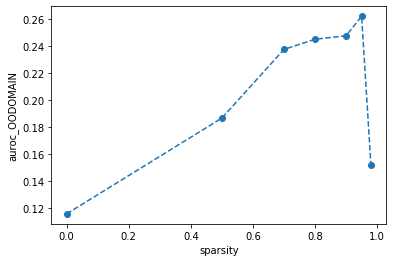

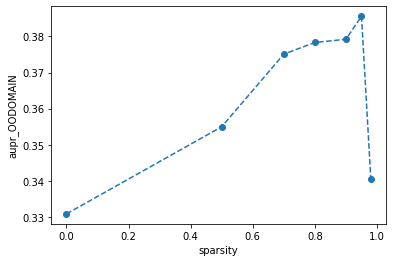

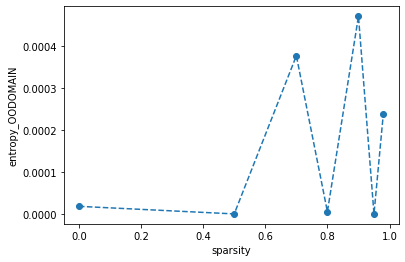

In [10]:
for col in subset.columns:
    if col.startswith("result"):

        plt.plot(subset["config.arguments.pruning_limit"], subset[col], linestyle='--', marker='o')
#         plt.title(col)
        plt.xlabel("sparsity")
        plt.ylabel(col.split('.')[-1])
        plt.show()